In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from process import load_trace, load_dataset, METRICS_CONFIGS
sns.set_theme()

In [63]:
def get_dataset(anomaly: str, metrics_config: int):
    if anomaly == "DDoS":
        dataset = pd.concat(
            [
                load_trace("LFBT_LFBL", "xFTx.xx", metrics_config)[0],
                load_trace("LFBT_LFBL", "SFTS.xx", metrics_config)[0],
            ]
        ).reset_index(drop=True)
    if anomaly == "CPUTHEFT":
        dataset = pd.concat(
            [
                load_trace("cputheft", "xFTx.xx", metrics_config)[0],
                load_trace("cputheft", "xUTx.xx", metrics_config)[0],
            ]
        ).reset_index(drop=True)
    if anomaly == "BPRED":
        dataset = pd.concat(
            [
                load_trace("bpred", "xFTx.xx", metrics_config)[0],
                load_trace("bpred", "xDTx.xx", metrics_config)[0],
            ]
        ).reset_index(drop=True)
    if anomaly == "SPECTRE":
        dataset = pd.concat(
            [
                load_trace("speculate", "xFTx.xx", metrics_config)[0],
                load_trace("speculate", "xKTx.xx", metrics_config)[0],
            ]
        ).reset_index(drop=True)
    dataset["CONTEXT"] = dataset["CONTEXT"].apply(lambda x: "NORMAL" if x == "NOSTRESS" else anomaly)
    return dataset

def plot_distr(anomaly: str, metrics_config: int):
    fig, axs = plt.subplots(3, 2, figsize=(12, 7), gridspec_kw={"hspace": 0.65})
    full_data = get_dataset(anomaly, metrics_config)
    fig.suptitle(f"{anomaly} Attack - METrICS Config {metrics_config + 1}", y=0.945, fontsize=12)
    for i, o in enumerate(METRICS_CONFIGS[metrics_config]):
        ax = axs[i % 3][i // 3]
        ax.set_title(f"{o}", fontsize=10)
        ax.set_xlabel("PMC value", fontsize=9)
        ax.set_ylabel("op count", fontsize=9)
        sns.histplot(data=full_data, x=o, bins=50, ax=ax, hue='CONTEXT')
        if i != 3:
            ax.get_legend().remove()
        
    plt.savefig(f"plots/{anomaly}_{metrics_config + 1}.png", dpi=300, bbox_inches='tight')
    # plot the duration with the same size of one of the subplots above
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 1.7))
    sns.histplot(data=full_data, x='DURATION', bins=50, ax=ax, hue='CONTEXT')
    ax.set_title("DURATION", fontsize=10)
    ax.set_xlabel("value", fontsize=9)
    ax.set_ylabel("op count", fontsize=9)
    ax.get_legend().remove()
    plt.savefig(f"plots/{anomaly}_{metrics_config + 1}_duration.png", dpi=300, bbox_inches='tight')


/var/folders/3h/05j5k9sx3gj8crg_qnwvzygc0000gn/T/ipykernel_35831/872096062.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, 2, figsize=(12, 7), gridspec_kw={"hspace": 0.65})


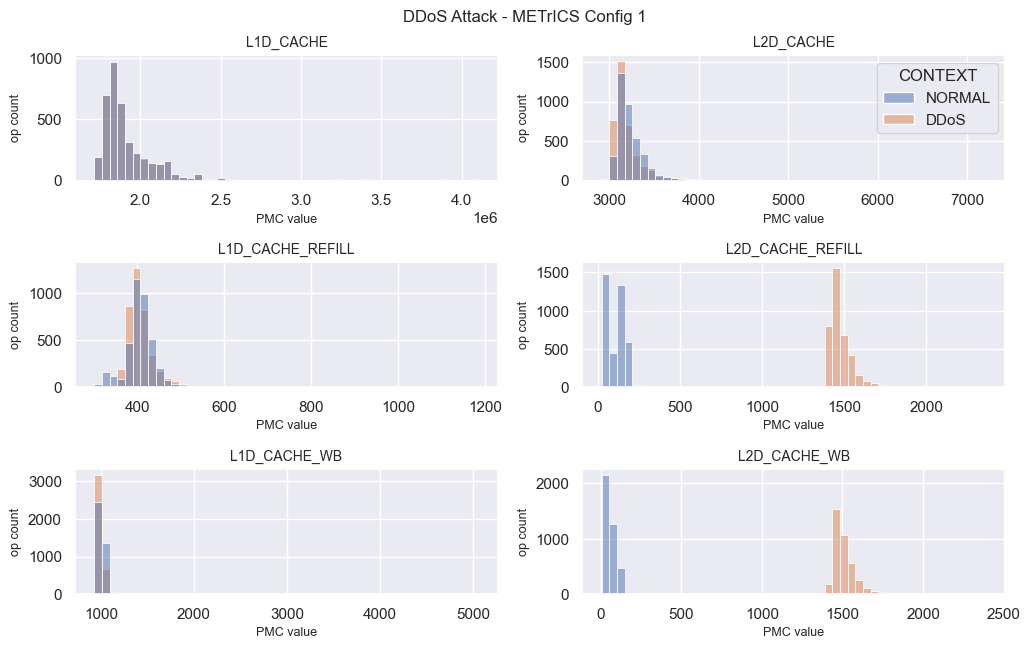

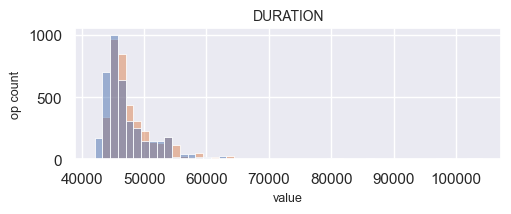

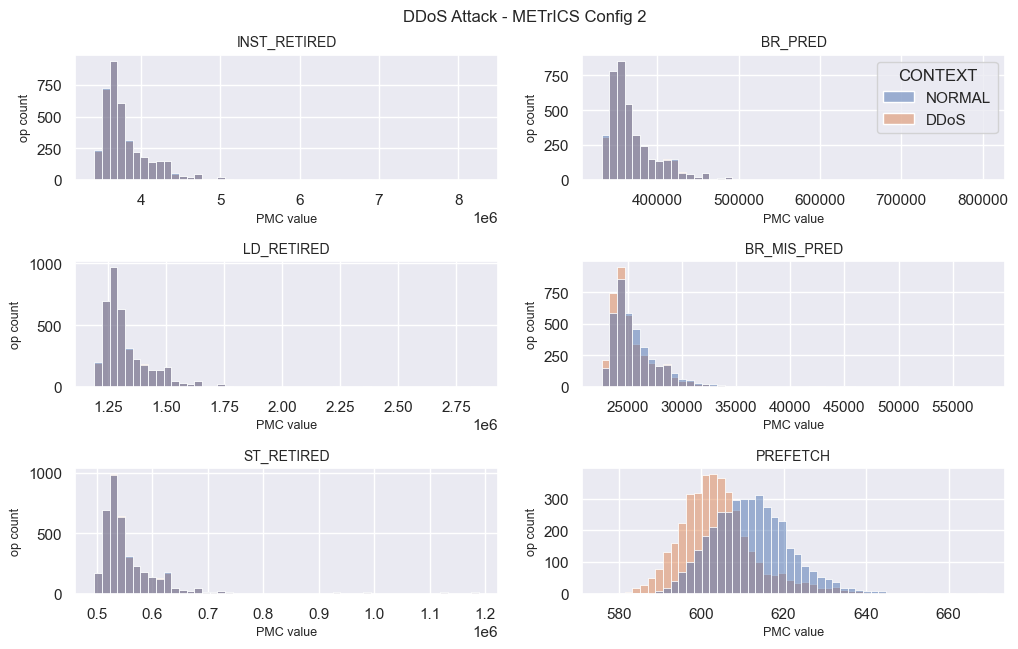

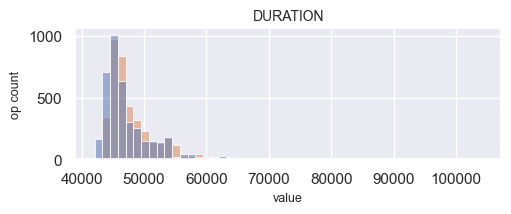

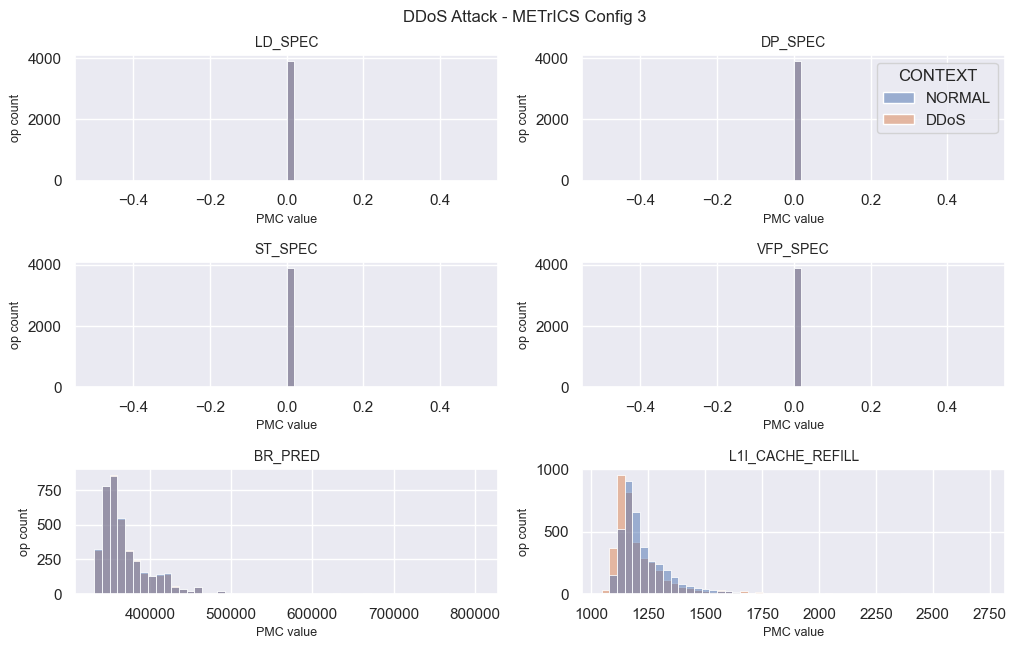

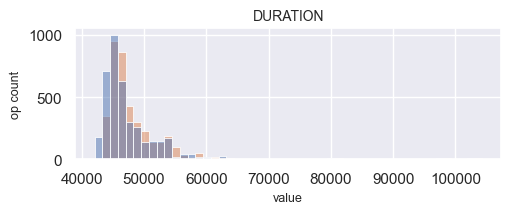

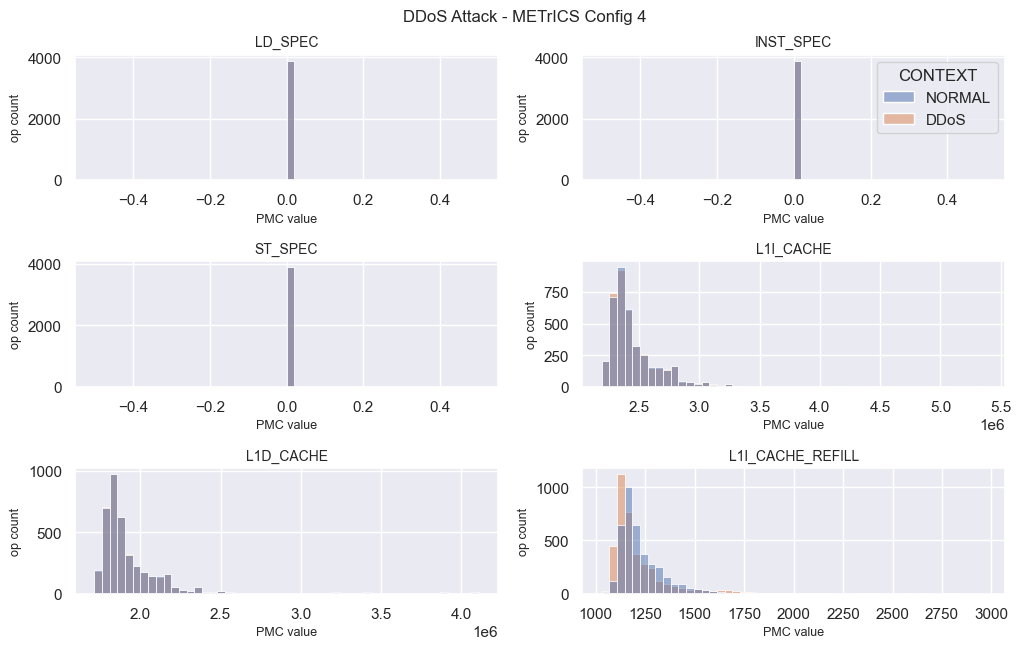

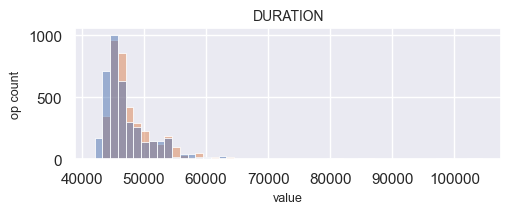

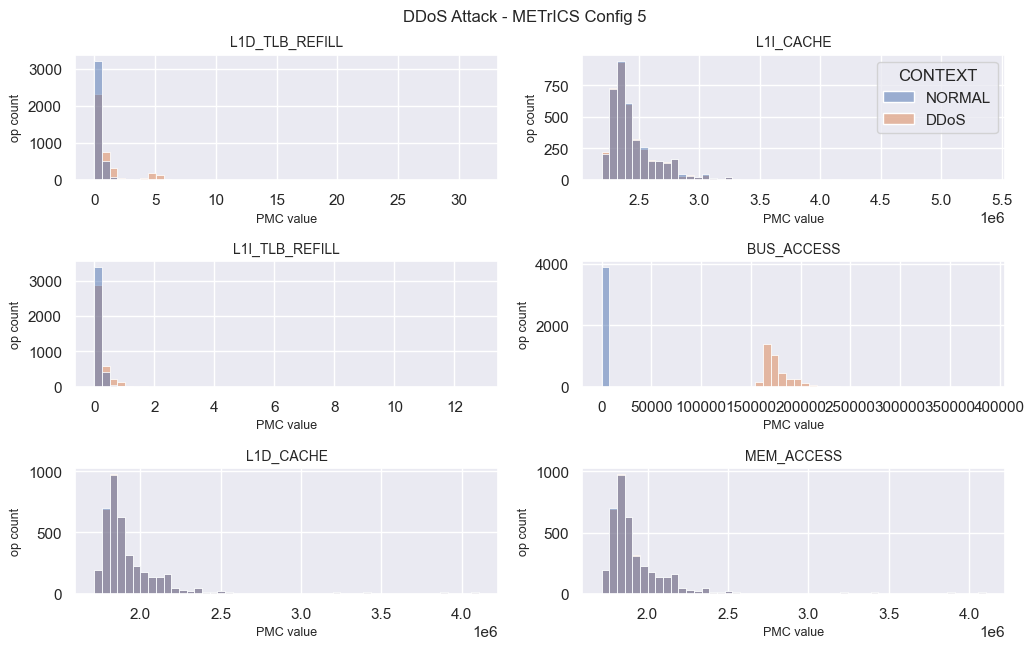

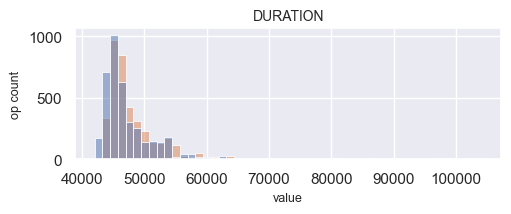

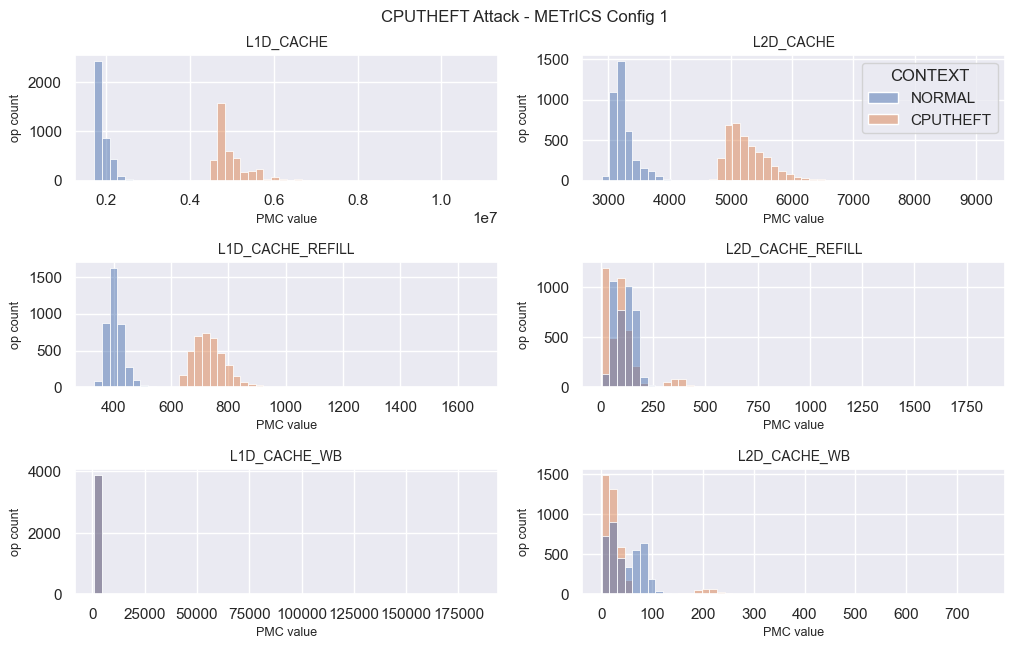

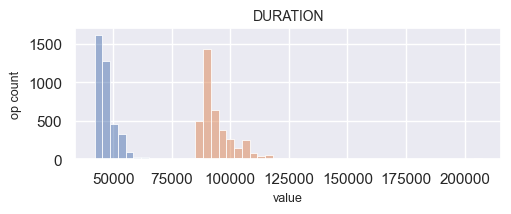

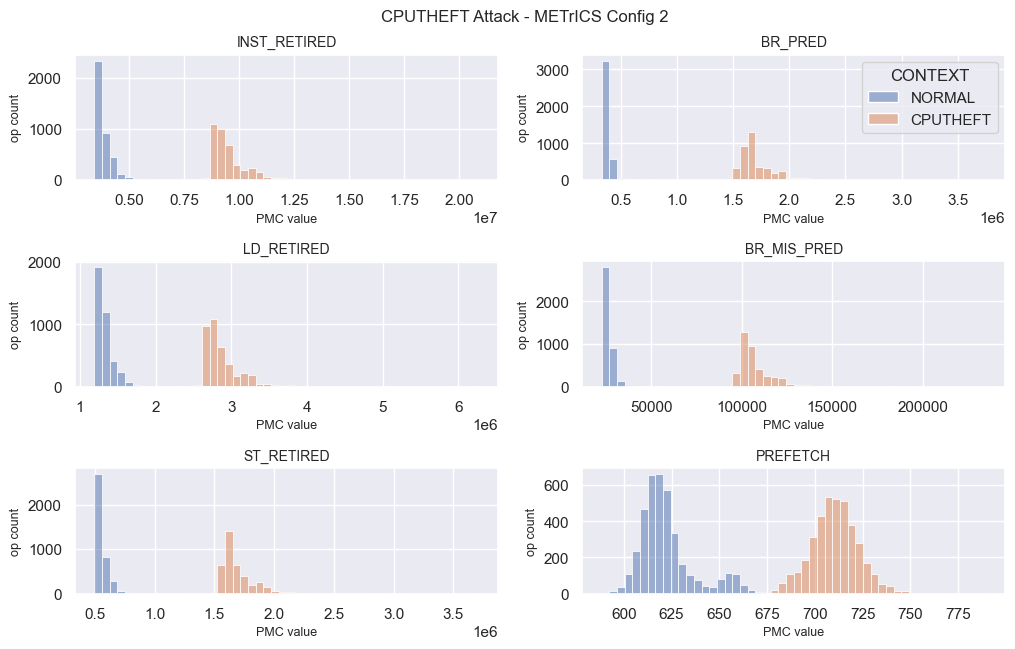

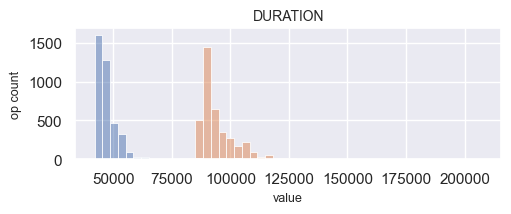

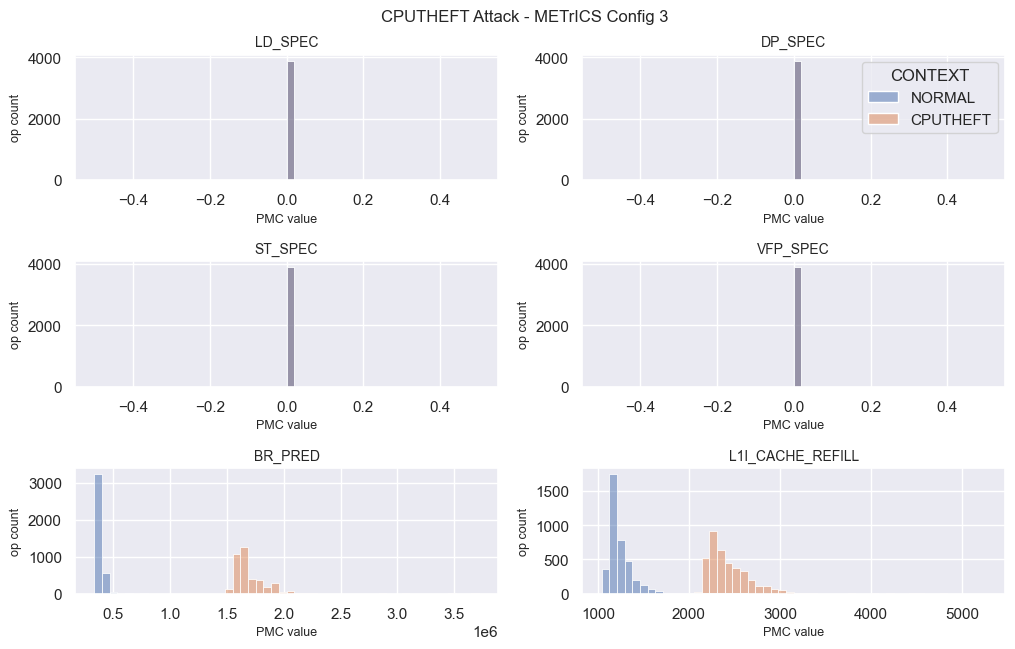

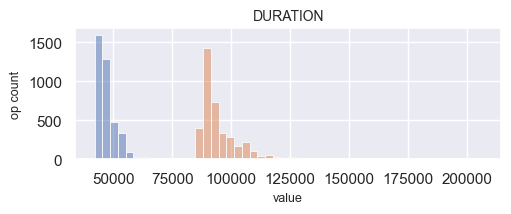

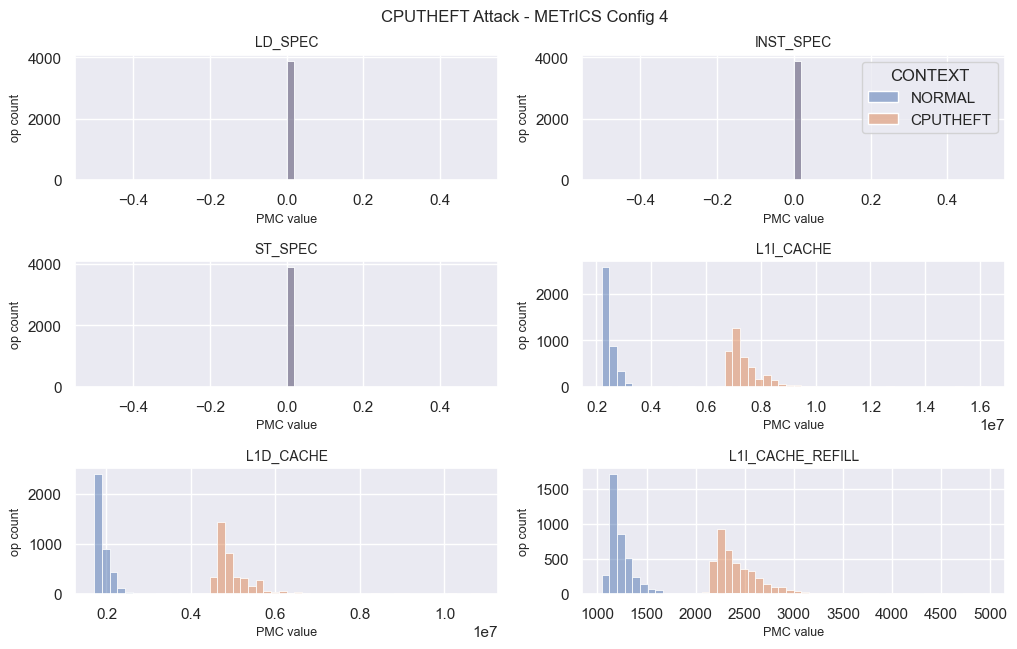

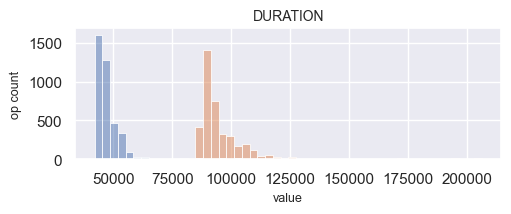

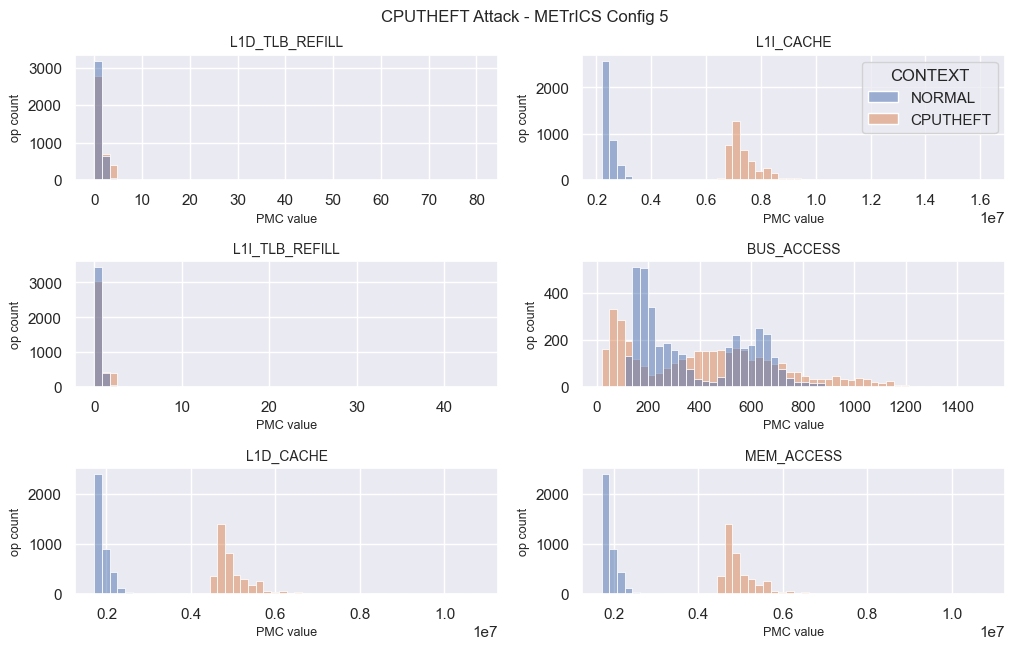

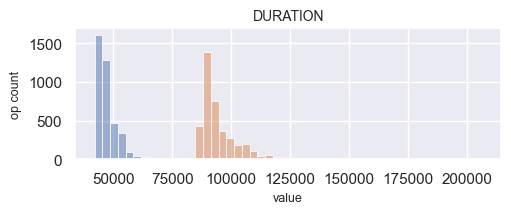

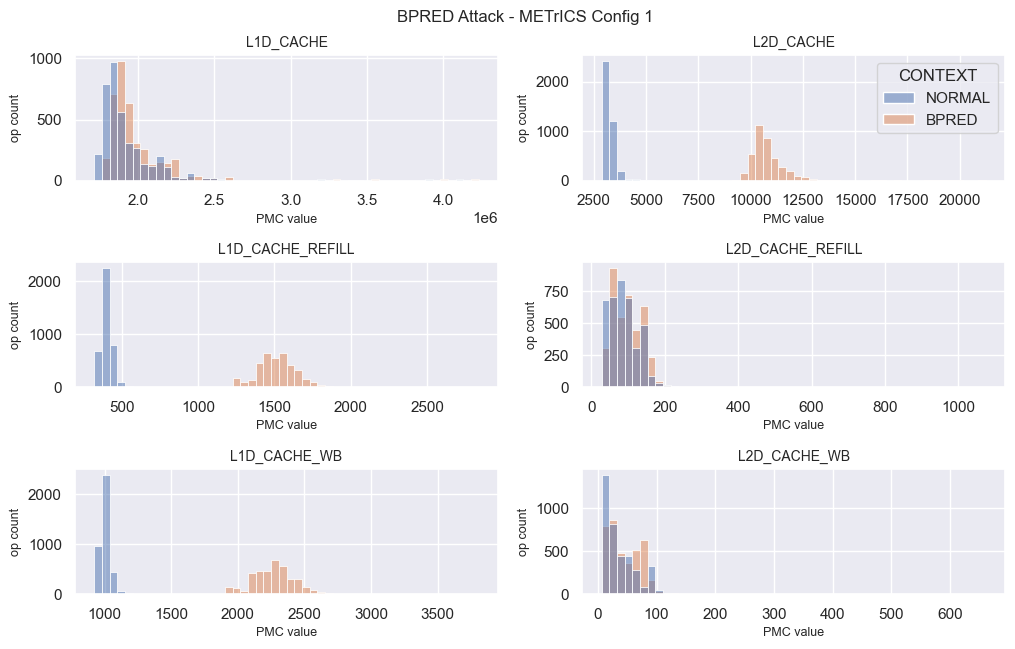

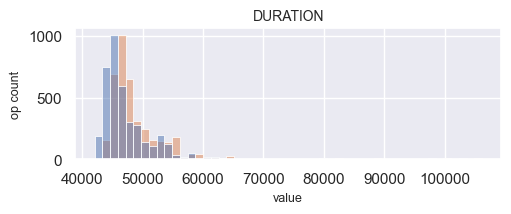

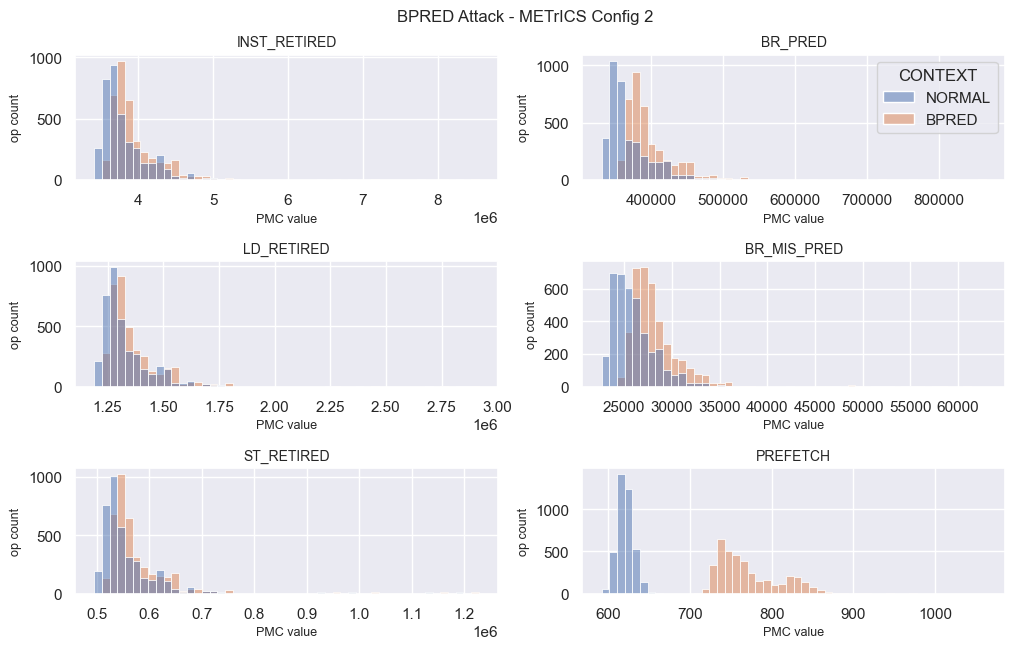

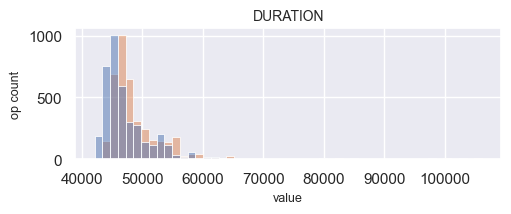

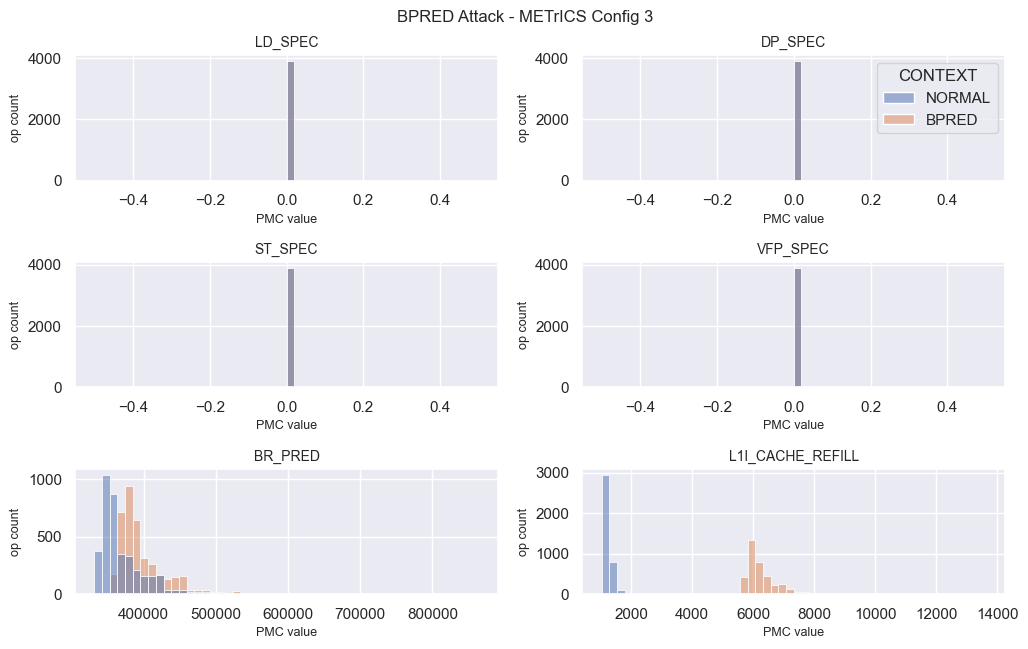

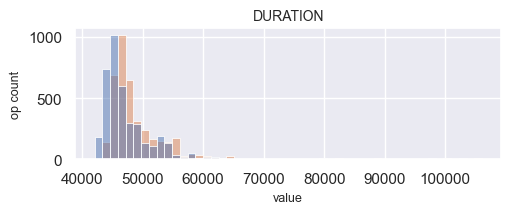

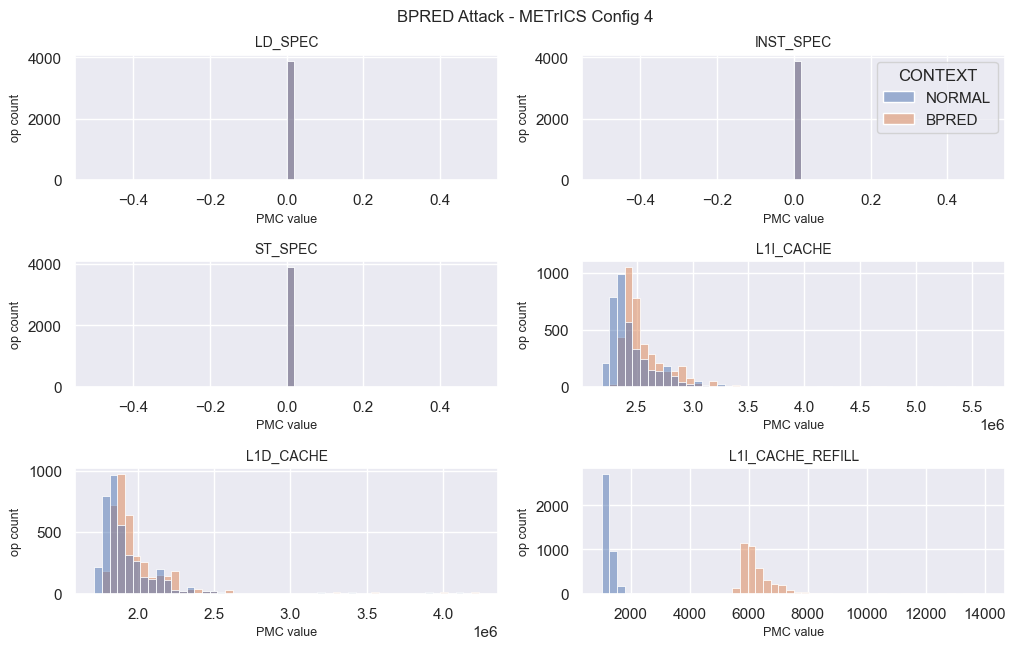

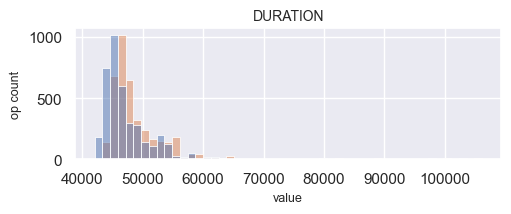

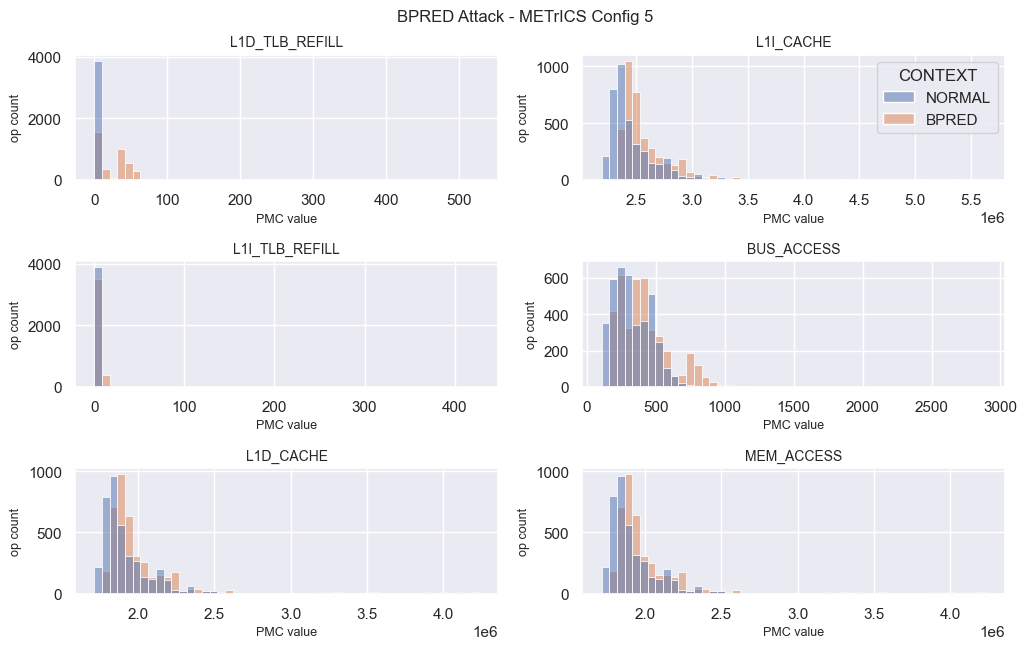

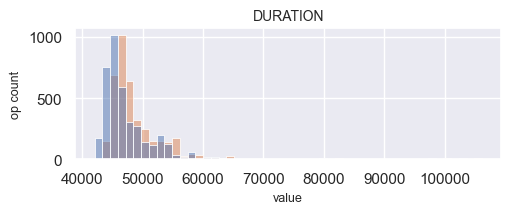

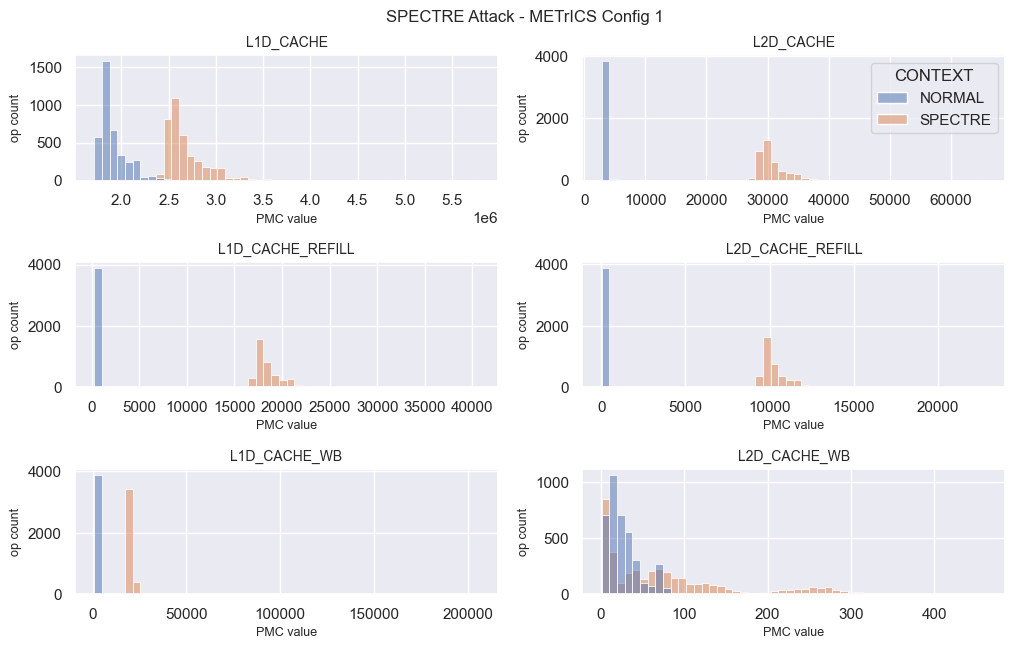

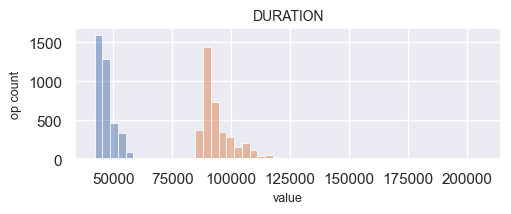

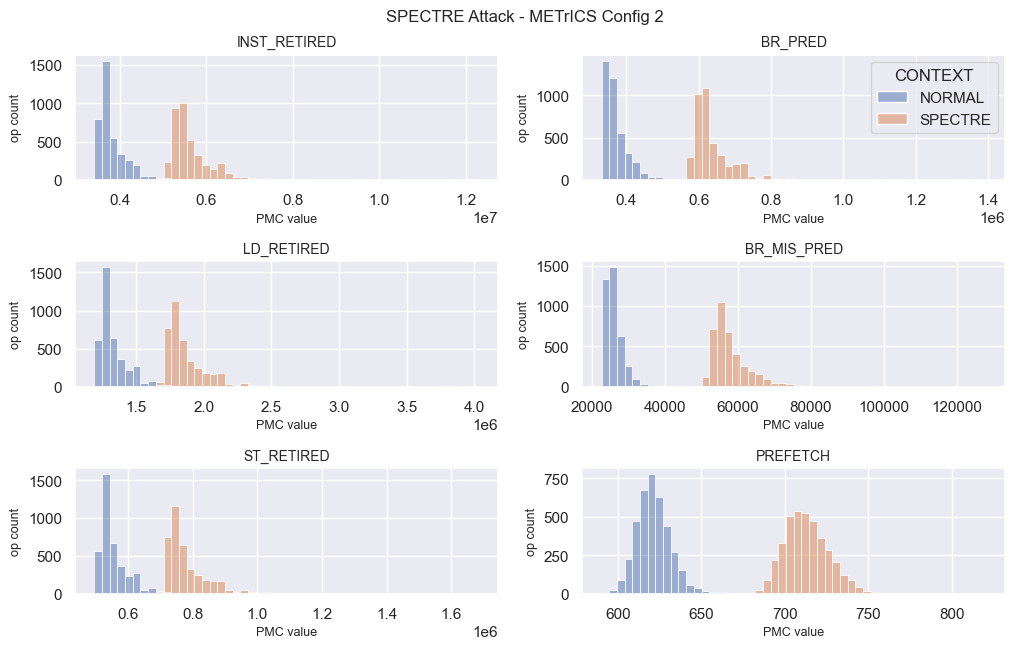

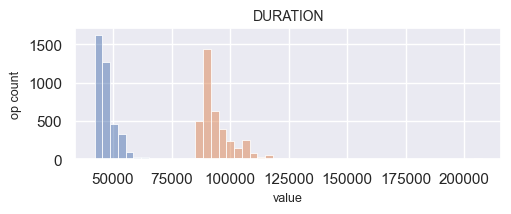

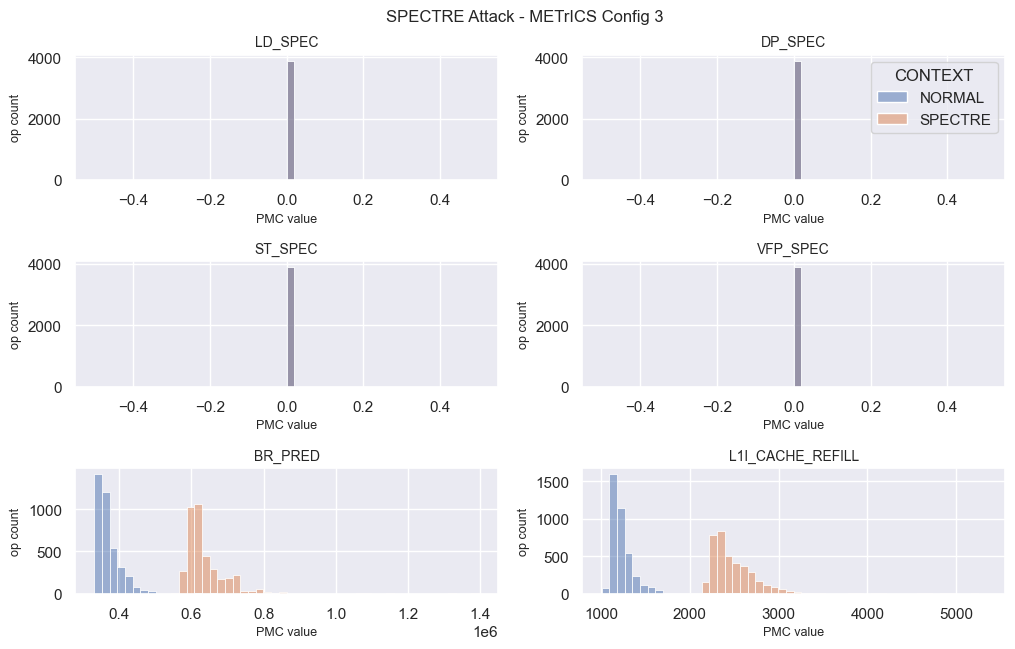

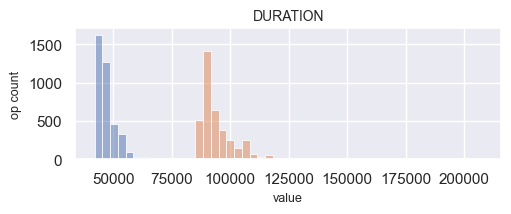

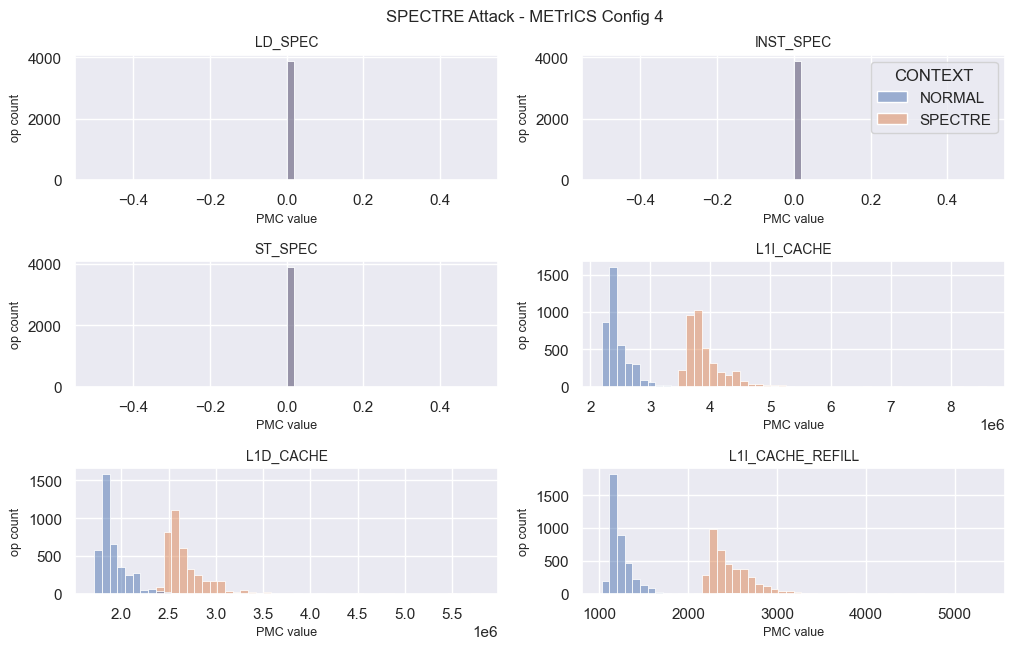

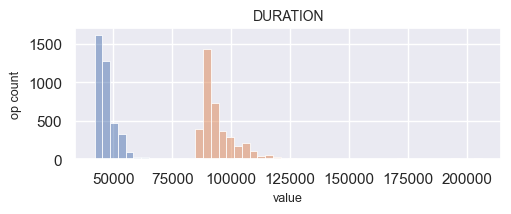

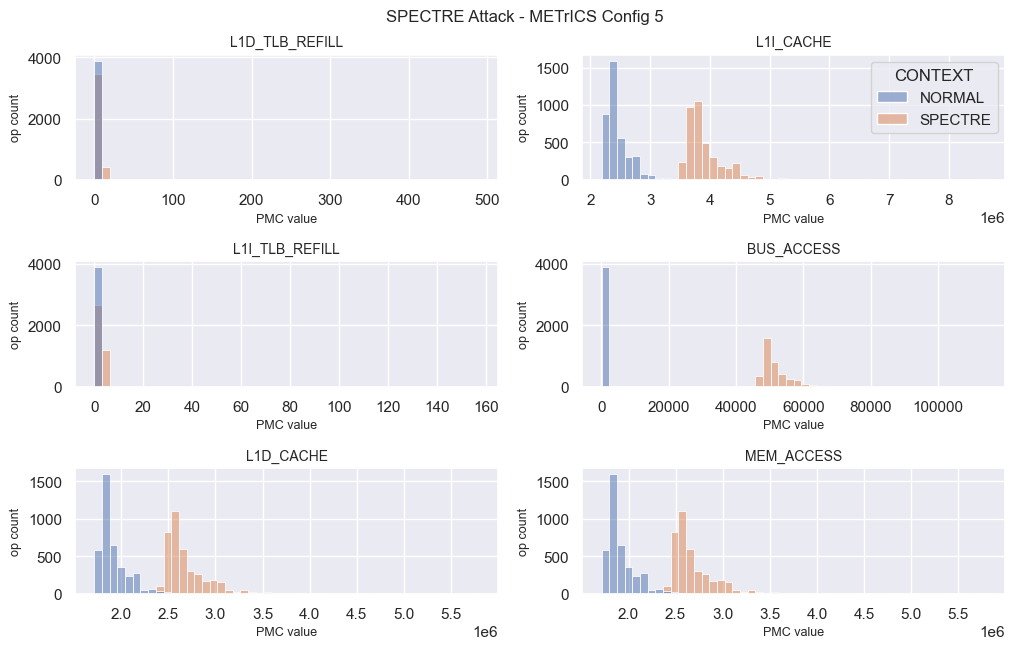

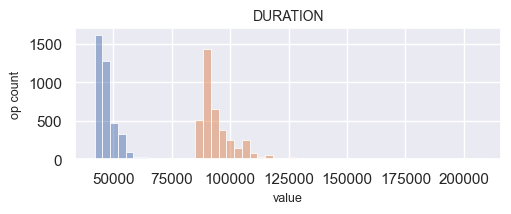

In [64]:
for ANOMALY in ["DDoS", "CPUTHEFT", "BPRED", "SPECTRE"]:
    for METRICS_CONFIG in range(5):
        plot_distr(ANOMALY, METRICS_CONFIG)